In [137]:
import pandas as pd

In [138]:
train=pd.read_csv('/aiffel/data/train.csv')
test=pd.read_csv('/aiffel/data/train.csv')

In [139]:
train.shape,test.shape

((39116, 16), (39116, 16))

In [140]:
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [142]:
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [143]:
test.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

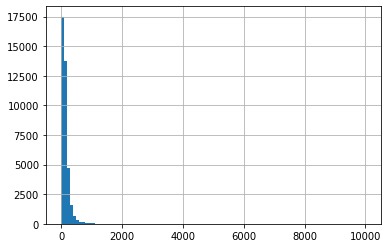

In [144]:
train['price'].hist(bins=100)

In [145]:
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [146]:
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [147]:
train=train.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)

In [148]:
train['reviews_per_month']=train['reviews_per_month'].fillna(0)
test['reviews_per_month']=test['reviews_per_month'].fillna(0)

In [149]:
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [150]:
target=train['price']
train=train.drop('price',axis=1)

In [151]:
cols=[
    'host_id',
    "latitude",
    "longitude",
    "minimum_nights",
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
    ]
train=train[cols]
test=test[cols]

In [152]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val,=train_test_split(train,target,test_size=0.3,random_state=2022)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((27381, 8), (11735, 8), (27381,), (11735,))

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

34082.13686379528

In [154]:
from sklearn.linear_model  import Ridge

model=Ridge()
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.07214e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


34086.294598571985

In [155]:
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

34827.16679309669

In [156]:
from sklearn.linear_model import ElasticNet

model=ElasticNet()
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

35635.55865234376

In [157]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=2022)
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

35220.13770252236

In [158]:
from xgboost import XGBRegressor
model=XGBRegressor(random_state=2022)
model.fit(x_train,y_train)
pred=model.predict(x_val)
mean_squared_error(y_val,pred)

36502.64747742424

In [159]:
y_test=pd.read_csv('/aiffel/data/y_test.csv')
pred=model.predict(test)
mean_squared_error(y_test,pred)

ValueError: Found input variables with inconsistent numbers of samples: [9779, 39116]

In [160]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

ValueError: Found input variables with inconsistent numbers of samples: [9779, 39116]

# <!-- 예시 -->
# # 라이브러리 
# import pandas as pd
# # 데이터 불러오기
# train = pd.read_csv('/aiffel/data/train.csv')
# test = pd.read_csv('/aiffel/data/test.csv')
# # 데이터 크기
# train.shape, test.shape
# # 데이터 샘플
# display(train.head(2))
# display(test.head(2))
# # 데이터 타입
# train.info()
# # 결측치(train)
# train.isnull().sum()
# # 결측치(test)
# test.isnull().sum()
# # target(hist)
# train['price'].hist(bins=100)
# # target(describe)
# train['price'].describe()
# # 피처(host_id)
# train['host_id'].value_counts()
# # 결측치 컬럼 삭제 (last_review)
# train = train.drop('last_review', axis=1)
# test = test.drop('last_review', axis=1)
# # 결측치 채우기
# train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
# test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
# # 결측치 확인
# train.isnull().sum()
# # 가격 값 복사
# target = train['price']
# train = train.drop('price', axis=1)
# # 수치형 피처 선택
# cols = [
#         'host_id',
#         'latitude', 
#         'longitude', 
#         'minimum_nights',
#         "number_of_reviews", 
#         'reviews_per_month',
#         'calculated_host_listings_count',
#         'availability_365'
#         ]

# train = train[cols]
# test = test[cols]
# # 검증 데이터 분리
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape
# # 머신러닝(회귀)
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# model = LinearRegression()
# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # 릿지 회귀
# from sklearn.linear_model import Ridge

# model = Ridge()
# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # 라쏘 회귀
# from sklearn.linear_model import Lasso

# model = Lasso()
# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # 엘라스틱넷 회귀
# from sklearn.linear_model import ElasticNet

# model = ElasticNet()
# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(random_state=2022)
# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # Xgboost
# from xgboost import XGBRegressor
# model = XGBRegressor(random_state=2022)

# model.fit(X_train, y_train)
# pred = model.predict(X_val)
# mean_squared_error(y_val, pred)
# # test 데이터 예측 및 평가
# y_test = pd.read_csv('/aiffel/data/y_test.csv')

# # Xgboost
# pred = model.predict(test)
# mean_squared_error(y_test, pred)
# # baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 프로젝트 도전

In [ ]:
train.shape,test.shape

In [ ]:
display(train.head(2))
display(test.head(2))

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

In [161]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt

In [162]:
import shutil
shutil.unpack_archive("/aiffel/data/data.zip","")

In [163]:
train_path="train/"
valid_path="validation/"
print(train_path)
print(valid_path)

train/
validation/


In [164]:
image_gen=ImageDataGenerator(rescale=(1/255.))
image_gen

In [165]:
train_gen=image_gen.flow_from_directory(train_path,
                                        batch_size=34,
                                        target_size=(98,98),
                                        classes=['good','bad'],
                                        class_mode='binary',
                                        seed=1)
valid_gen=image_gen.flow_from_directory(valid_path,
                                        batch_size=34,
                                        target_size=(98,98),
                                        classes=['good','bad'],
                                        class_mode='binary',
                                        seed=1)

Found 695 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [166]:
# flow_from_directory 함수로 폴더에서 이미지 가져옴
train_gen = image_gen.flow_from_directory(train_path, 
                                          batch_size=32, 
                                          target_size=(96, 96),   
                                          classes=['good','bad'], 
                                          class_mode = 'binary',
                                          seed=0)

valid_gen = image_gen.flow_from_directory(valid_path,                                          
                                          batch_size=32, 
                                          target_size=(96, 96),   
                                          classes=['good','bad'], 
                                          class_mode = 'binary',
                                          seed=0)

Found 695 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [170]:
class_labes=['good','bad']
batch=next(train_gen)
images,labels=batch[0],batch[1]

plt.figure(figsize=(12,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()무ㅇㅓㅅ인가 틀렸는건가..

SyntaxError: invalid syntax (994360171.py, line 12)

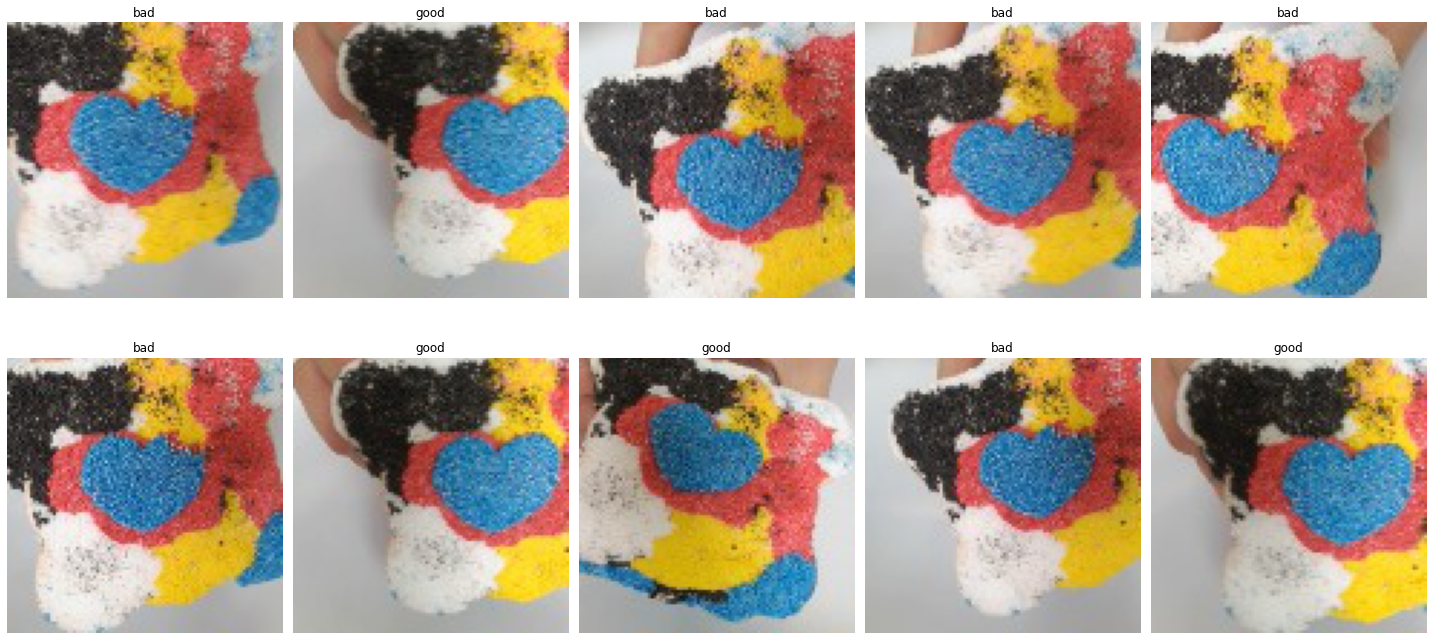

In [182]:
# 샘플 이미지 출력 
# range 크기만 바꾸지 않는다면 fig size 는 얼마든지 변환시켜도 괜찮다
class_labels = ['good','bad']
batch = next(train_gen)
images, labels = batch[0], batch[1]
# range 차이가 오류가 나네요
plt.figure(figsize=(20, 10))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [196]:
from tensorflow.keras.layers import Flatten, Dense , Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

mode=Sequential([
    tf.keras.layers.BatchNormalization(),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0,5),
    Dense(1,activation='sigmoid')
])
# 대문자 구분잘해야한다 안하면 오류남

# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
                    tf.keras.layers.BatchNormalization(),
                    Conv2D(16, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [189]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
                    tf.keras.layers.BatchNormalization(),
                    Conv2D(16, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [197]:
model.compile(optimizer='adam'.
             loss='binary_crossentropy'
             metrics=['accuracy'])

SyntaxError: invalid syntax (1848616712.py, line 2)

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [3]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [92]:
# 결측치(test)
test.isnull().sum()

host_id                           0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [93]:
# target(hist)
train['price'].hist(bins=100)

KeyError: 'price'

In [9]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [10]:
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [11]:
train =train.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)

In [13]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        "number_of_reviews", 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

In [17]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

KeyError: 'price'

In [16]:
# 결측치 확인
train.isnull().sum()

host_id                              0
latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

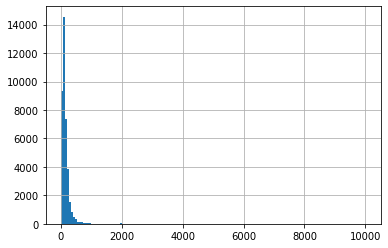

In [4]:
import pandas as pd
train=pd.read_csv('/aiffel/data/train.csv')
test=pd.read_csv('/aiffel/data/test.csv')
train.shape
test.shape
train.info()
train.isnull().sum()
test.isnull().sum()
train['price'].hist(bins=150)
train['price'].describe()
train['host_id'].value_counts()
train=train.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)
train['reviews_per_month']=train['reviews_per_month'].fillna(0)
test['reviews_per_month']=test['reviews_per_month'].fillna(0)
train.isnull().sum()
test.isnull().sum()
target=train['price']
train=train.drop('price',axis=1)

In [5]:
import pandas as pd
train=pd.read_csv('/aiffel/data/train.csv')
test=pd.read_csv('/aiffel/data/test.csv')

In [6]:
train.shape
test.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [7]:
train['reviews_per_month']=train['reviews_per_month'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

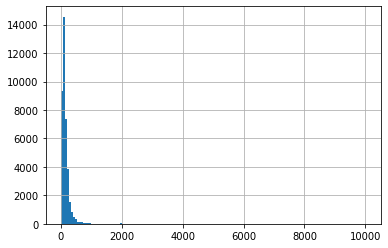

In [1]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 프로젝트 도전
import pandas as pd
train=pd.read_csv('/aiffel/data/train.csv')
test=pd.read_csv('/aiffel/data/test.csv')
train.shape
test.shape
train.info()
train.isnull().sum()
test.isnull().sum()
train['price'].hist(bins=150)
train['price'].describe()
train['host_id'].value_counts()
train=train.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)

In [2]:
train.isnull().sum()
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

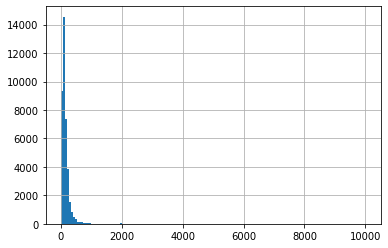

In [1]:
import pandas as pd
train=pd.read_csv('/aiffel/data/train.csv')
test=pd.read_csv('/aiffel/data/test.csv')
train.shape
test.shape
train.info()
train.isnull().sum()
test.isnull().sum()
train['price'].hist(bins=150)
train['price'].describe()
train['host_id'].value_counts()
train=train.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)

In [2]:
test['reviews_per_month']=test['reviews_per_month'].fillna(0)
train['reviews_per_month']=train['reviews_per_month'].fillna(0)

In [3]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

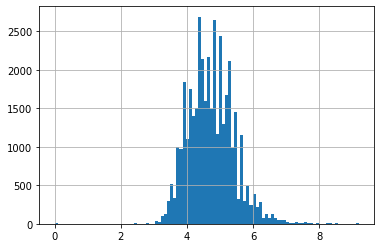

In [4]:
train['price']=np.log1p(train['price'])
train['price'].hist(bins=100)

In [5]:
train.isnull().sum() 

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [6]:
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
target=train['price']
train=train.drop('price',axis=1)

In [8]:
n_train=train.select_dtypes(exclude='object').copy()
c_train=train.select_dtypes(include='object').copy()
n_test=test.select_dtypes(exclude='object').copy()
c_test=test.select_dtypes(include='object').copy()

In [9]:
n_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
n_test.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.779000e+03,9.779000e+03,9779.000000,9779.000000,9779.000000,9779.000000,9779.000000,9779.000000,9779.000000
mean,1.914716e+07,6.713435e+07,40.729351,-73.952348,7.186931,23.280908,1.086699,7.356887,111.983332
std,1.094296e+07,7.779631e+07,0.054657,0.045361,21.292983,44.398170,1.583322,34.094038,131.417711
min,3.647000e+03,2.787000e+03,40.507080,-74.242850,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.712214e+06,7.656150e+06,40.690265,-73.982600,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.980302e+07,3.130494e+07,40.723390,-73.955280,3.000000,5.000000,0.370000,1.000000,44.000000
75%,2.919050e+07,1.072729e+08,40.763815,-73.936100,5.000000,24.000000,1.560000,2.000000,222.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.716900,1000.000000,597.000000,19.750000,327.000000,365.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=[
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365'
    ]
display(n_train.head(1))
n_train[cols]=scaler.fit_transform(n_train[cols])
n_test[cols]=scaler.fit_transform(n_test[cols])
display(n_train.head(1))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,0.731742,0.539318,0.001601,0.004769,0.09,0.003067,0.0


In [12]:
n_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,0.555225,0.550016,0.004796,0.037000,1.091963,0.018683,0.309537
std,1.099302e+07,7.881383e+07,0.132102,0.087225,0.016261,0.070889,1.600772,0.100188,0.360752
min,2.539000e+03,2.438000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.412608e+06,7.834978e+06,0.461150,0.491561,0.000000,0.001590,0.040000,0.000000,0.000000
50%,1.963650e+07,3.070949e+07,0.541050,0.543214,0.000801,0.007949,0.370000,0.000000,0.123288
75%,2.913445e+07,1.074344e+08,0.637868,0.579724,0.003203,0.036566,1.590000,0.003067,0.624658
max,3.648561e+07,2.743213e+08,1.000000,1.000000,1.000000,1.000000,58.500000,1.000000,1.000000


In [13]:
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [14]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=[
    'neighbourhood_group',
    'neighbourhood',
    'room_type'
]

display(c_train.head(1))
for col in cols:
    c_train[col]=le.fit_transform(c_train[col])
    c_test[col]=le.transform(c_test[col])
    
display(c_train.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


In [16]:
del_cols=['name','host_name']
c_train=c_train.drop(del_cols,axis=1)
c_test=c_test.drop(del_cols,axis=1)

In [17]:
train=pd.concat([n_train,c_train],axis=1)
test=pd.concat([n_test,c_test],axis=1)
print(train.shape,test.shape)
train.head()

(39116, 12) (9779, 12)


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,14963583,94219511,0.731742,0.539318,0.001601,0.004769,0.09,0.003067,0.000000,2,94,1
1,9458704,49015331,0.631633,0.478445,0.000801,0.101749,1.68,0.003067,0.717808,2,95,0
2,26871281,440022,0.558041,0.449354,0.047238,0.001590,0.20,0.000000,0.000000,2,209,0
3,698132,3577509,0.464162,0.579361,0.002402,0.379968,2.89,0.003067,0.002740,1,13,0
4,15783953,12475280,0.458611,0.543571,0.021617,0.000000,0.00,0.000000,0.000000,1,13,1


In [53]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
# 너무 많이수정해서 뭐가 빠졌는지도 기억이 안나요 ㅇㅎ

((31292, 12), (7824, 12), (31292,), (7824,))

In [59]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

76391.5103529245

In [46]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.37584e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.24989141642203822

In [44]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.46166066495341995

In [40]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.46159853771617937

In [56]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.18318331739950763

In [60]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

76391.5103529245